# Introduction

This project sets out to compare and analyze the success of the top performing books as movies.

The movie is never as good as the book was right? That is the very question we are seeking to find out with this project.


*This project will attempt to answer the following questions:* 

- Does publishing more books equate to more and better movies?
- Does the filming location matter for better ratings?
- Are older or newer published books more popular as movies?

## Methodology

Book data was taken from the [10000 Good Books DataSet](https://www.kaggle.com/datasets/zygmunt/goodbooks-10k?select=books.csv) and the Movie data was taken from the [Top 100 popular movies from 2003 to 2022 (iMDB)](https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb).


## Results
 
### 1. Import Libraries
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

### 2. Import and clean the Book and Movie Data

#### Also perform the merge for a third DataFrame

In [2]:
top_books = pd.read_csv("books.csv")

top_books.dropna()

top_books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [3]:
top_movies = pd.read_csv("movies.csv")

top_movies.dropna()

top_movies.rename(columns={"Title": "title"}, inplace=True)
top_movies.columns

Index(['title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [4]:
top_books.drop(['id', 'book_id', 'best_book_id', 'work_id', 'isbn', ], axis=1, inplace=True)
top_books.sort_values('average_rating', ascending=False)

,books_count,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,14,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,11,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,34,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,6,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,en-US,4.76,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,96,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,ESV Study Bible,eng,4.76,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,18,9.780061e+12,"Gregory Maguire, Douglas Smith",2001.0,Lost,Lost,eng,2.80,12534,12937,921,1749,3377,4518,2237,1056,https://images.gr-assets.com/books/1407711681m...,https://images.gr-assets.com/books/1407711681s...
4008,57,9.780802e+12,Candace Bushnell,2000.0,Four Blondes,Four Blondes,NaN,2.80,22278,23272,943,3921,5722,7219,3904,2506,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8006,45,9.781409e+12,Howard Jacobson,2010.0,The Finkler Question,The Finkler Question,eng,2.76,9627,12062,1913,1887,3046,3909,2466,754,https://images.gr-assets.com/books/1319018978m...,https://images.gr-assets.com/books/1319018978s...
3549,63,9.780317e+12,Alice Sebold,2007.0,The Almost Moon,The Almost Moon,eng,2.67,28299,31183,5223,5670,8233,9978,5312,1990,https://images.gr-assets.com/books/1310421579m...,https://images.gr-assets.com/books/1310421579s...


In [5]:
both_lists = pd.merge(top_books, top_movies, on="title")
both_lists.columns

Index(['books_count', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'Rating', 'Year', 'Month',
       'Certificate', 'Runtime', 'Directors', 'Stars', 'Genre',
       'Filming_location', 'Budget', 'Income', 'Country_of_origin'],
      dtype='object')

### 3. Explore the Data

#### Question 1: Does publishing more books equate to more and better movies?

In [6]:
top_author = top_books['authors'].value_counts().idxmax()
author_book_count = pd.Series(top_books['authors'].value_counts(), index=top_books['authors'])
author_book_count.drop_duplicates(inplace=True)
author_book_count.sort_values(inplace=True)
author_book_count

authors
George Orwell, Erich Fromm, Celâl Üster     1
Harper Lee                                  2
Khaled Hosseini                             3
John Green                                  4
F. Scott Fitzgerald                         5
J.R.R. Tolkien                              6
Dan Brown                                   7
J.K. Rowling, Mary GrandPré                 8
Suzanne Collins                             9
Douglas Adams                              10
Stephenie Meyer                            11
Veronica Roth                              12
Cassandra Clare                            13
Bill Bryson                                14
Sophie Kinsella                            15
George R.R. Martin                         16
Ken Follett                                17
Dr. Seuss                                  18
C.S. Lewis                                 19
Jeffrey Archer                             20
Orson Scott Card                           21
Rick Riordan              

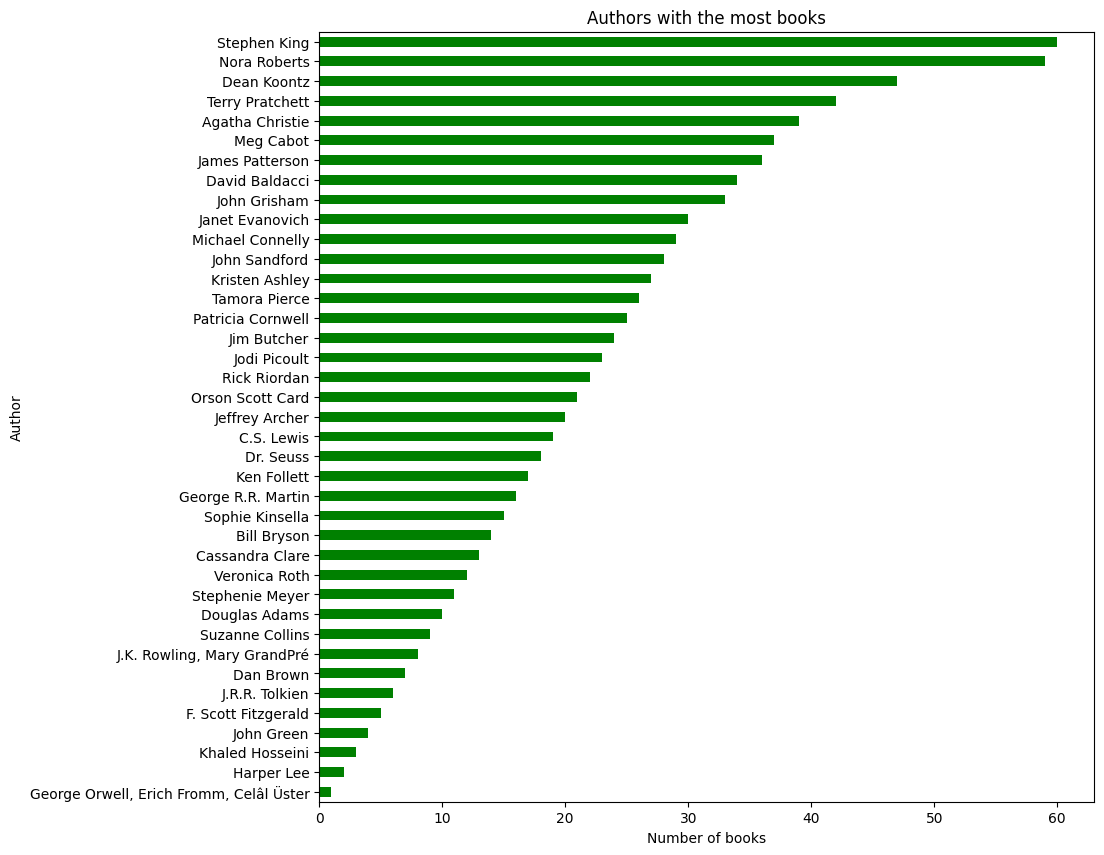

In [7]:
author_book_count.plot(kind='barh', figsize=(10, 10), color='green')
plt.title('Authors with the most books')
plt.xlabel('Number of books')
plt.ylabel('Author')
plt.show()


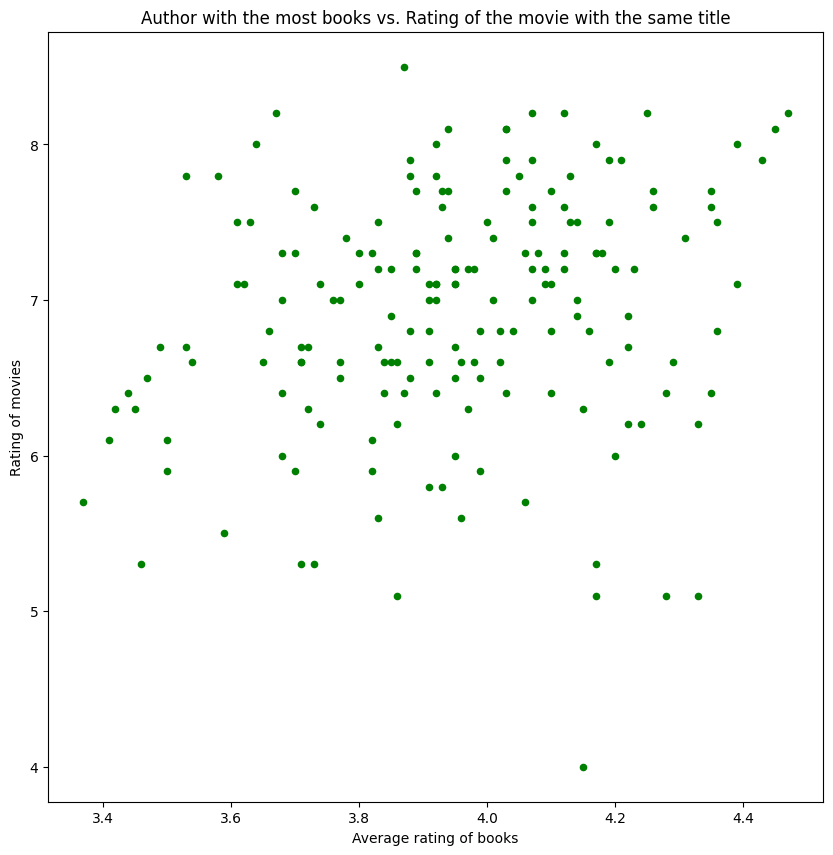

In [8]:
both_lists.plot(kind='scatter', x='average_rating', y='Rating', figsize=(10, 10), color='green')
plt.title('Author with the most books vs. Rating of the movie with the same title')
plt.xlabel('Average rating of books')
plt.ylabel('Rating of movies')
plt.show()

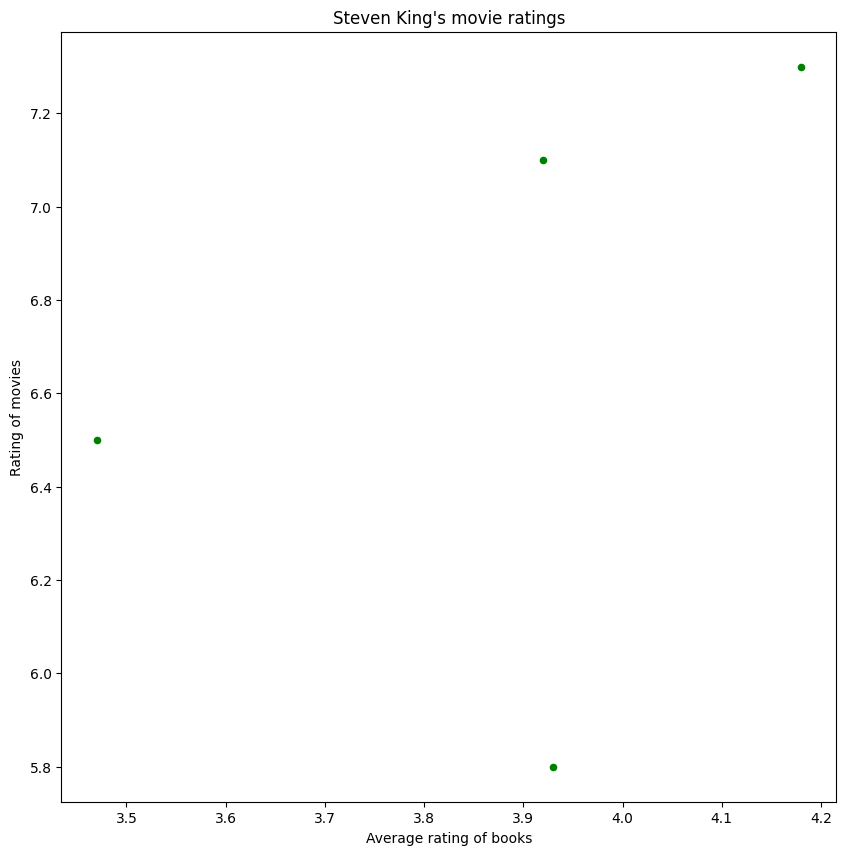

In [9]:
both_lists[both_lists['authors'] == 'Stephen King'].plot(kind='scatter', x='average_rating', y='Rating', figsize=(10, 10), color='green')
plt.title('Steven King\'s movie ratings')
plt.xlabel('Average rating of books')
plt.ylabel('Rating of movies')
plt.show()

### Findings

* Steven King has the most books out of the dataset at 60.
* The more books published does not directly correlate to more movies.
* The more books published does not directly correlate to higher rated movies.

#### Question 2: Does the filming location matter for better ratings?

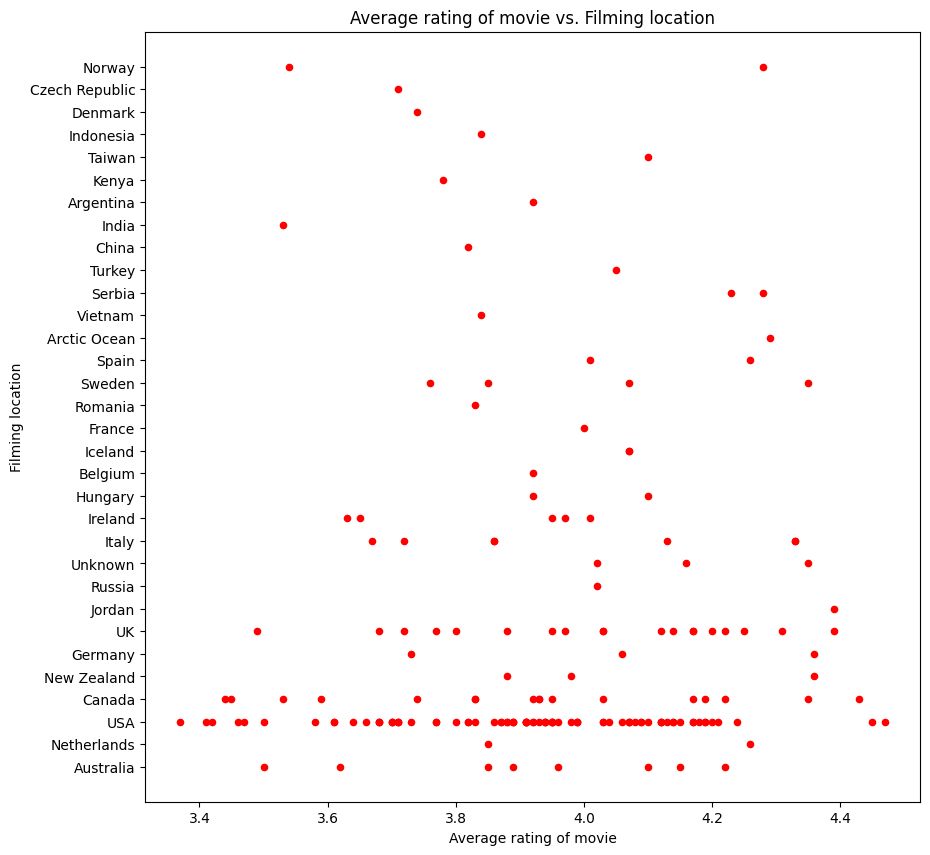

In [10]:
#plot the average rating of movie vs the filming location
both_lists.plot(kind='scatter', x='average_rating', y='Filming_location', figsize=(10, 10), color='red')
plt.title('Average rating of movie vs. Filming location')
plt.xlabel('Average rating of movie')
plt.ylabel('Filming location')
plt.show()

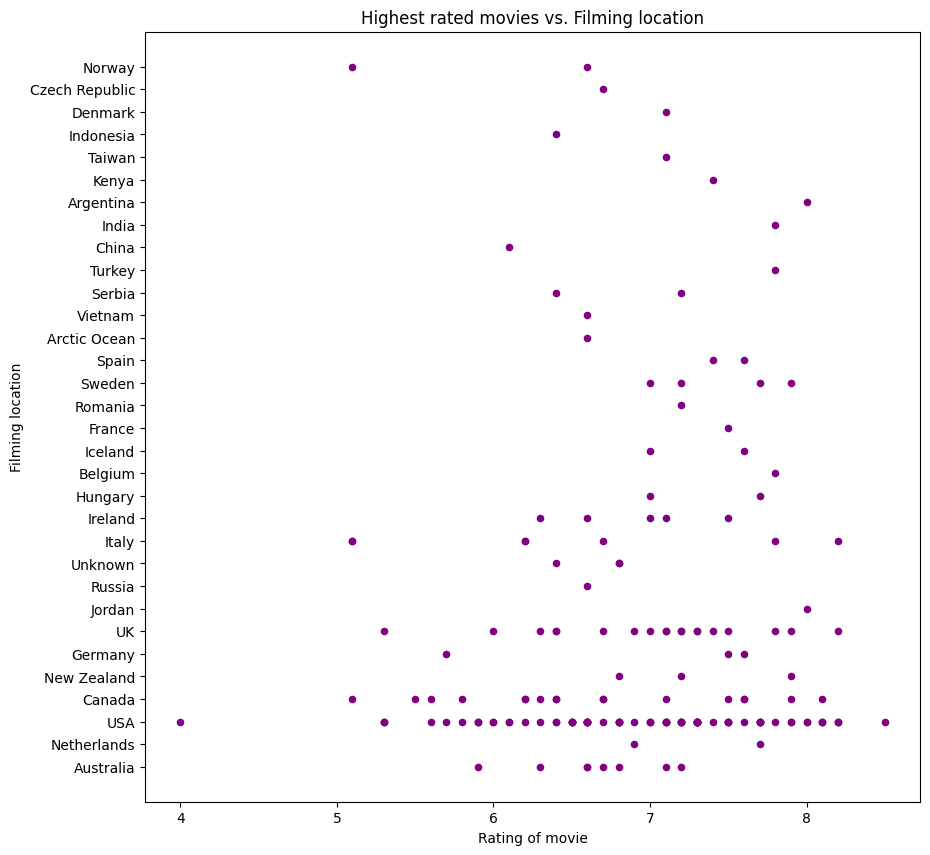

In [11]:
#plot the highest rated movies vs the filming location
both_lists.plot(kind='scatter', x='Rating', y='Filming_location', figsize=(10, 10), color='purple')
plt.title('Highest rated movies vs. Filming location')
plt.xlabel('Rating of movie')
plt.ylabel('Filming location')
plt.show()


### Findings

* The distribution of higher rated movies is concentrated in the US and other western countries.
* With the US producing more movies overall, a direct correlation between higher rated movies and location cannot be drawn.
* It can be said from this data that the more movies a location produces, the higher the likelyhood of a movie being rated highly.

#### Question 3: Are older or newer published books more popular as movies?

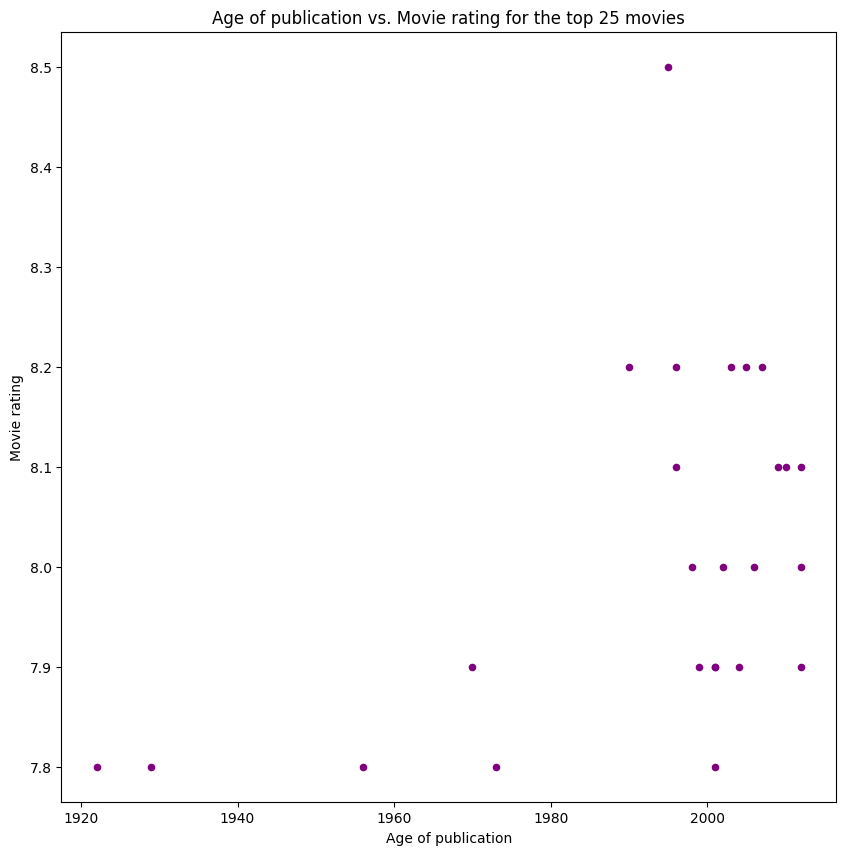

In [12]:
both_lists.sort_values('Rating', ascending=False).head(25).plot(kind='scatter', x='original_publication_year', y='Rating', figsize=(10, 10), color='purple')
plt.title('Age of publication vs. Movie rating for the top 25 movies')
plt.xlabel('Age of publication')
plt.ylabel('Movie rating')
plt.show()



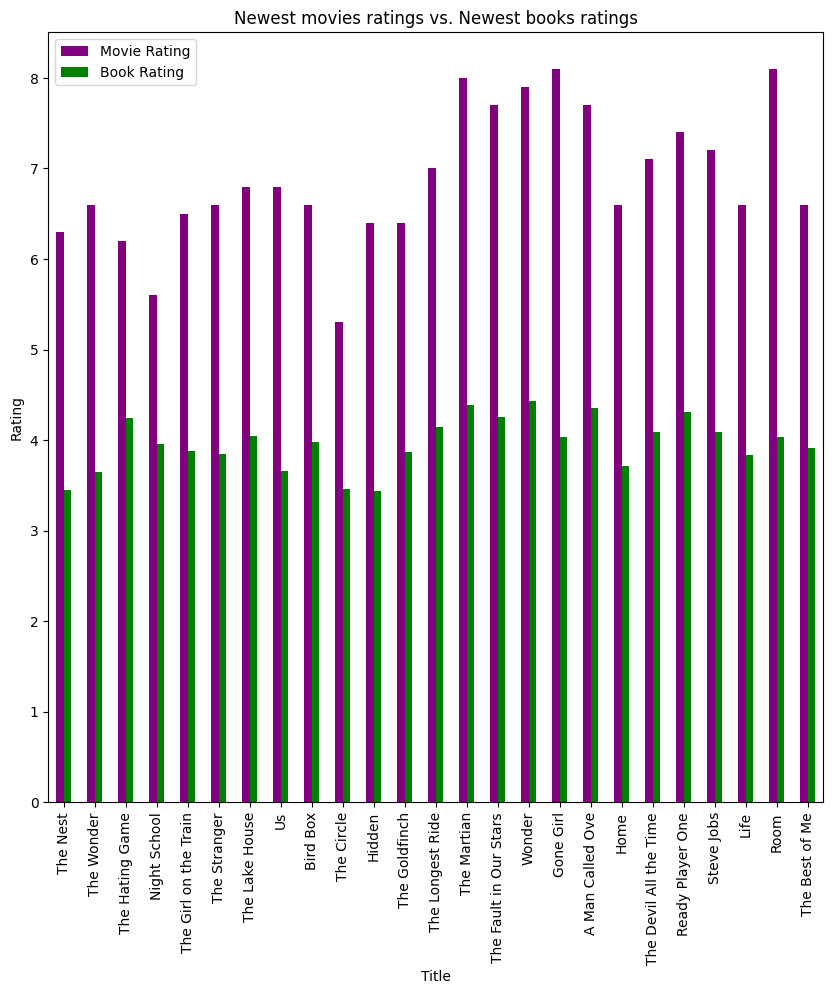

In [13]:
both_lists.sort_values('original_publication_year', ascending=False).head(25).plot(kind='bar', x='title', y=['Rating', 'average_rating'], figsize=(10, 10), color=['purple', 'green'])
plt.title('Newest movies ratings vs. Newest books ratings')
plt.xlabel('Title')
plt.ylabel('Rating')
plt.legend(['Movie Rating', 'Book Rating'])
plt.show()




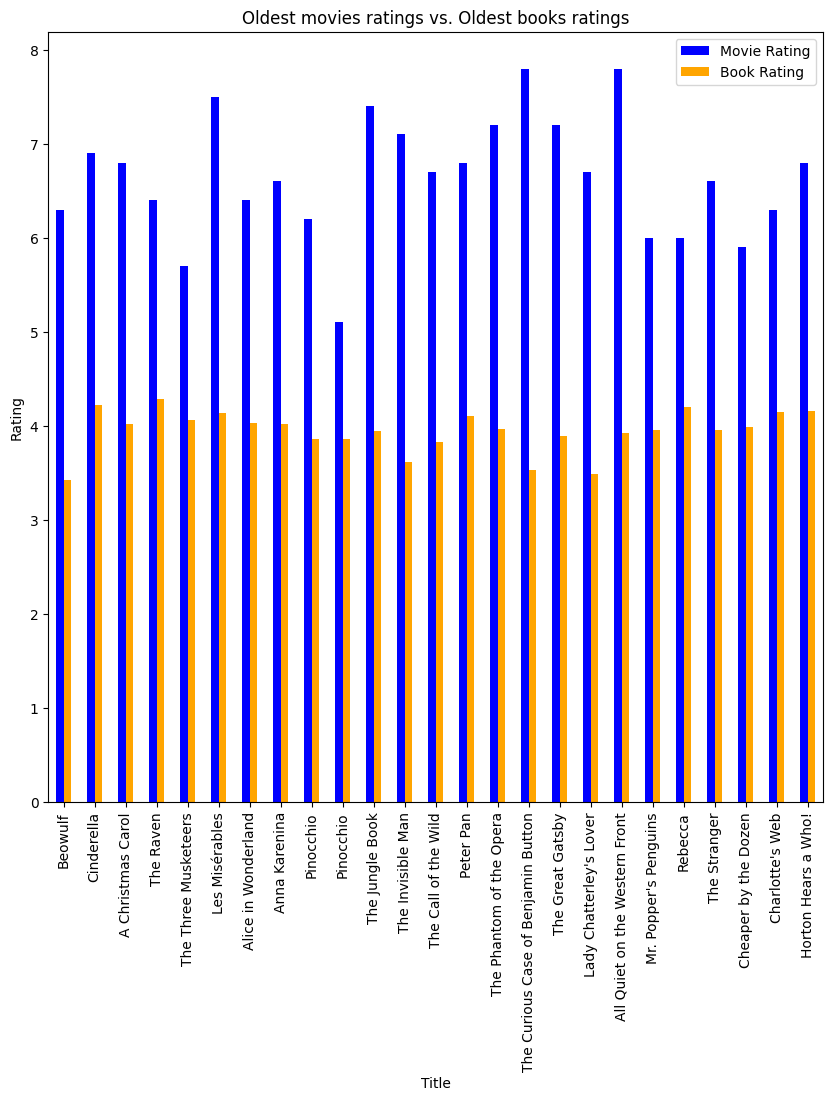

In [14]:
#plot the oldest movies ratings vs the oldest books ratings in a stacked bar chart change the legend to movie and book
both_lists.sort_values('original_publication_year', ascending=True).head(25).plot(kind='bar', x='title', y=['Rating', 'average_rating'], figsize=(10, 10), color=['blue', 'orange'])
plt.title('Oldest movies ratings vs. Oldest books ratings')
plt.xlabel('Title')
plt.ylabel('Rating')
plt.legend(['Movie Rating', 'Book Rating'])
plt.show()

### Findings

* Newer books are more often more popular as movies than older books.
* Movies are generally rated higher on average than their book counterparts. 
* Highly rated books generally do well as movies as well.

# Conclusions

Through this study we have found:


* Steven King has the most books out of the dataset at 60.
* The more books published does not directly correlate to more movies.
* The more books published does not directly correlate to higher rated movies.
* The distribution of higher rated movies is concentrated in the US and other western countries.
* With the US producing more movies overall, a direct correlation between higher rated movies and location cannot be drawn.
* It can be said from this data that the more movies a location produces, the higher the likelyhood of a movie being rated highly.
* Newer books are more often more popular as movies than older books.
* Movies are generally rated higher on average than their book counterparts. 
* Highly rated books generally do well as movies as well.


# Suggestions for Further Study:

Was revenue for movies based on popular books higher?

Did more popular books get bigger movie budgets when being turned into a film? 

What was the biggest driving factor for a book to be made into a movie? 